# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Upoload dos dados

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://github.com/wesleyesantos/StreamlitDatathon/raw/refs/heads/main/assets/PEDE_PASSOS_DATASET_FIAP.csv', delimiter=';')

# Analisando os dados 🔎

In [ ]:
# Tem algumas inconsistências de nomenclatura em relação ao dataset e o PDF de dicionário, mas acho que tudo bem...
# Reparei também que temos colunas faltando, sendo elas: **REC_PSICO_2021**, **REC_PSICO_2022** e **INSTITUICAO_ENSINO_ALUNO_2022**.

**Essa linha demonstra que o Aluno foi ingressado em 2022, e todas as outras colunas são nulas. Uma recomendação seria criar para cada ano um dataset separado para início das análises.** 🤔

In [ ]:
pd.DataFrame(df.loc[df['NOME'] == 'ALUNO-2']).transpose().T

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.2,9.433333,NaN,2.0,5.625,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)


In [ ]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [ ]:
# df.info()

# Tivemos adição de colunas novas no dataset ao longo do tempo 🤔

In [ ]:
len(df.columns[df.columns.str.contains('2020')])

18

In [ ]:
col20 = df.columns[df.columns.str.contains('2020')]
col20 = col20.str.replace('_2020','')
col20

Index(['INSTITUICAO_ENSINO_ALUNO', 'IDADE_ALUNO', 'ANOS_PM', 'FASE_TURMA',
       'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG',
       'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN'],
      dtype='object')

In [ ]:
len(df.columns[df.columns.str.contains('2021')])

20

In [ ]:
col21 = df.columns[df.columns.str.contains('2021')]
col21 = col21.str.replace('_2021','')
#col21 = col21.difference(col20)
col21

Index(['FASE', 'TURMA', 'INSTITUICAO_ENSINO_ALUNO', 'SINALIZADOR_INGRESSANTE',
       'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'REC_EQUIPE_1',
       'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4', 'PONTO_VIRADA', 'IPV',
       'IAN', 'NIVEL_IDEAL', 'DEFASAGEM'],
      dtype='object')

In [ ]:
len(df.columns[df.columns.str.contains('2022')])

30

In [ ]:
df.columns[df.columns.str.contains('2022')]

Index(['FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'IPP_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

# Funções reutilizáveis 🤓

In [ ]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [ ]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [ ]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

In [ ]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

# DF - 2020




In [ ]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10


In [ ]:
len(df_2020) # com NaN

1349

In [ ]:
df_2020 = cleaning_dataset(df_2020)
len(df_2020)

728

In [ ]:
df_2020['INSTITUICAO_ENSINO_ALUNO_2020'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2020,
Escola Pública,598
Rede Decisão/União,101
FIAP,11
UNISA,10
Estácio,3
Einstein,2
Escola João Paulo II,2
V202,1


In [ ]:
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10


## Ajuste da coluna FASE_TURMA_2020

In [ ]:
df_2020['FASE_2020'] = df_2020['FASE_TURMA_2020'].str[0]
df_2020['TURMA_2020'] = df_2020['FASE_TURMA_2020'].str[1]
df_2020['FASE_2020'] = df_2020['FASE_2020'].replace('D','2')
df_2020['TURMA_2020'] = df_2020['TURMA_2020'].replace('2','D')
df_2020.drop('FASE_TURMA_2020', axis=1, inplace=True)

In [ ]:
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2020,TURMA_2020
0,Escola Pública,ALUNO-1,11,2,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2,H
2,Escola Pública,ALUNO-3,12,2,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3,H
3,Escola Pública,ALUNO-4,10,2,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,1,D
4,Escola Pública,ALUNO-5,10,1,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2,M
7,Rede Decisão/União,ALUNO-8,14,3,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,4,L


In [ ]:
df_2020['PEDRA_2020'].value_counts()

,count
PEDRA_2020,
Ametista,336
Ágata,171
Quartzo,128
Topázio,92
D9891/2A,1


In [ ]:
df_2020[df_2020['PEDRA_2020']=='D9891/2A']

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2020,TURMA_2020
1258,V202,ALUNO-1259,D108,D971,D9600,D980,D9891/2,D9891/2A,D301,0,NaN,D910,V920,D930,D940,D950,D960,D970,2,D


In [ ]:
df_2020 = df_2020[df_2020['PEDRA_2020']!='D9891/2A']

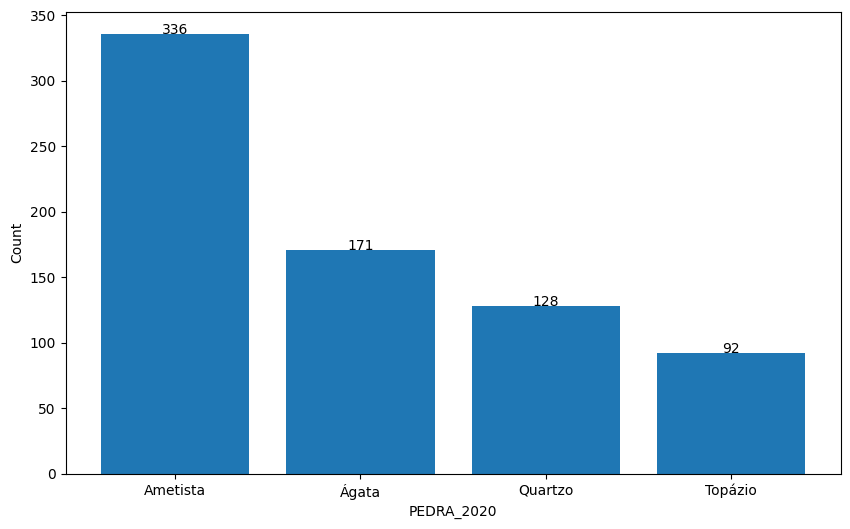

In [ ]:
plot_exact_counter(size=(10, 6), x='PEDRA_2020', y=df_2020['PEDRA_2020'].value_counts(), df=df_2020)

# **Ideias** 🤔

* Predição de desempenho futuro e análise de outliers (*O que fez alguns alunos serem um dos melhores que já passou na Passos?*)
* Predição para recomendação de bolsas, intercambio, etc
* Análise comparatória de 2020, 2021 e 2022
* Análise de alunos (*de forma individual? 🤔*) ao longo dos anos (*Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?*)
* Análise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.
* Tentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada


# 2021

In [ ]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


In [ ]:
df_2021['PEDRA_2021'].value_counts()

,count
PEDRA_2021,
Ametista,295
Ágata,178
Quartzo,110
Topázio,101
#NULO!,2


In [ ]:
df_2021[df_2021['PEDRA_2021']=='#NULO!']

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
70,ALUNO-71,0.0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,3.6,0.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,5.0,Nível 2 (5o e 6o ano),-2.0
505,ALUNO-506,0.0,J,Escola Pública,Veterano,#NULO!,#NULO!,7.4,0.0,5.0,4.1,0.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,#NULO!,0.0,10.0,ALFA (2o e 3o ano),0.0


# 2022

In [ ]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [ ]:
df_2022['PEDRA_2022'].value_counts()

,count
PEDRA_2022,
Ametista,348
Ágata,250
Quartzo,134
Topázio,130


In [ ]:
df_2022['DESTAQUE_IEG_2022'].unique()

array(['Destaque: A sua boa entrega das lições de casa.',
       'Melhorar: Melhorar a sua entrega de lições de casa.'],
      dtype=object)

In [ ]:
df_2022['DESTAQUE_IEG_2022'] = df_2022['DESTAQUE_IEG_2022'].replace('Destaque: A sua boa entrega das lições de casa.',0) # Progrediu
df_2022['DESTAQUE_IEG_2022'] = df_2022['DESTAQUE_IEG_2022'].replace('Melhorar: Melhorar a sua entrega de lições de casa.',0) # Não progrediu tanto

# Gráficos

In [ ]:
# Separar base para criar gráfico de evolução das pedras por ano e aluno
df_20_pedras = df_2020.groupby('PEDRA_2020')['PEDRA_2020'].count().reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
df_21_pedras = df_2021.groupby('PEDRA_2021')['PEDRA_2021'].count().reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
df_22_pedras = df_2022.groupby('PEDRA_2022')['PEDRA_2022'].count().reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
df_20_pedras['ano'] = '2020'
df_21_pedras['ano'] = '2021'
df_22_pedras['ano'] = '2022'

In [ ]:
df_20_pedras.head()

,PEDRA_2020,Quantidade,ano
0,Ametista,336,2020
3,Ágata,171,2020
1,Quartzo,128,2020
2,Topázio,92,2020


In [ ]:
df_20_pedras = df_20_pedras[df_20_pedras['PEDRA_2020'] != 'D9891/2A']
df_21_pedras = df_21_pedras[df_21_pedras['PEDRA_2021'] != '#NULO!']

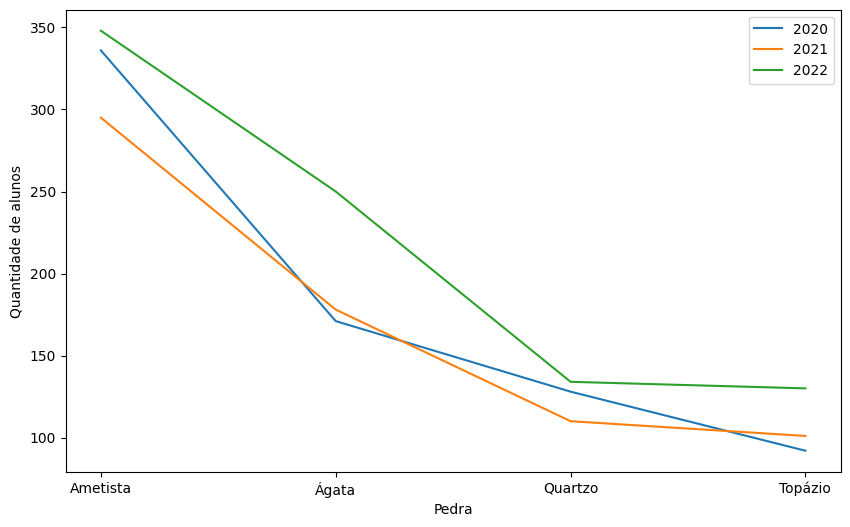

In [ ]:
plt.figure(figsize=(10,6))
plt.plot( df_20_pedras['PEDRA_2020'], df_20_pedras['Quantidade'], label='2020')
plt.plot(df_21_pedras['PEDRA_2021'], df_21_pedras['Quantidade'], label='2021')
plt.plot(df_22_pedras['PEDRA_2022'], df_22_pedras['Quantidade'], label='2022')
plt.xlabel('Pedra')
plt.ylabel('Quantidade de alunos')
plt.legend()
plt.show()

In [ ]:
df_2020['ANO'] = '2020'
df_2021['ANO'] = '2021'
df_2022['ANO'] = '2022'

In [ ]:
df_2020_aluno = df_2020[['NOME', 'ANO','PONTO_VIRADA_2020','FASE_2020', 'TURMA_2020' , 'PEDRA_2020',  'INDE_2020', 'IAA_2020',	'IEG_2020',	'IPS_2020',	'IDA_2020',	'IPP_2020',	'IPV_2020',	'IAN_2020']]
df_2021_aluno = df_2021[['NOME', 'ANO', 'PONTO_VIRADA_2021','FASE_2021', 'TURMA_2021' ,'PEDRA_2021',  'INDE_2021', 'IAA_2021',	'IEG_2021',	'IPS_2021',	'IDA_2021',	'IPP_2021',	'IPV_2021',	'IAN_2021']]
df_2022_aluno = df_2022[['NOME', 'ANO', 'PONTO_VIRADA_2022', 'FASE_2022', 'TURMA_2022' ,'PEDRA_2022',  'INDE_2022', 'IAA_2022',	'IEG_2022',	'IPS_2022',	'IDA_2022',	'IPP_2022',	'IPV_2022',	'IAN_2022']]

In [ ]:
df_2020_aluno.rename(columns={'ano':'ANO', 'PONTO_VIRADA_2020': 'PONTO_VIRADA', 'FASE_2020': 'FASE', 'TURMA_2020':'TURMA' ,'PEDRA_2020': 'PEDRA', 'INDE_2020': 'INDE', 'IAA_2020': 'IAA', 'IEG_2020': 'IEG', 'IPS_2020': 'IPS', 'IDA_2020': 'IDA', 'IPP_2020': 'IPP', 'IPV_2020': 'IPV', 'IAN_2020': 'IAN'}, inplace=True)
df_2021_aluno.rename(columns={'ano':'ANO','PONTO_VIRADA_2021': 'PONTO_VIRADA','FASE_2021': 'FASE', 'TURMA_2021':'TURMA' ,'PEDRA_2021': 'PEDRA', 'INDE_2021': 'INDE', 'IAA_2021': 'IAA', 'IEG_2021': 'IEG', 'IPS_2021': 'IPS', 'IDA_2021': 'IDA', 'IPP_2021': 'IPP', 'IPV_2021': 'IPV', 'IAN_2021': 'IAN'}, inplace=True)
df_2022_aluno.rename(columns={'ano':'ANO','PONTO_VIRADA_2022': 'PONTO_VIRADA','FASE_2022': 'FASE', 'TURMA_2022':'TURMA' ,'PEDRA_2022': 'PEDRA', 'INDE_2022': 'INDE', 'IAA_2022': 'IAA', 'IEG_2022': 'IEG', 'IPS_2022': 'IPS', 'IDA_2022': 'IDA', 'IPP_2022': 'IPP', 'IPV_2022': 'IPV', 'IAN_2022': 'IAN'}, inplace=True)
df_aluno = pd.concat([df_2020_aluno, df_2021_aluno, df_2022_aluno], axis=0)
df_aluno.head()

<ipython-input-52-d79568ce3d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_aluno.rename(columns={'ano':'ANO', 'PONTO_VIRADA_2020': 'PONTO_VIRADA', 'FASE_2020': 'FASE', 'TURMA_2020':'TURMA' ,'PEDRA_2020': 'PEDRA', 'INDE_2020': 'INDE', 'IAA_2020': 'IAA', 'IEG_2020': 'IEG', 'IPS_2020': 'IPS', 'IDA_2020': 'IDA', 'IPP_2020': 'IPP', 'IPV_2020': 'IPV', 'IAN_2020': 'IAN'}, inplace=True)
<ipython-input-52-d79568ce3d75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_aluno.rename(columns={'ano':'ANO','PONTO_VIRADA_2021': 'PONTO_VIRADA','FASE_2021': 'FASE', 'TURMA_2021':'TURMA' ,'PEDRA_2021': 'PEDRA', 'INDE

,NOME,ANO,PONTO_VIRADA,FASE,TURMA,PEDRA,INDE,IAA,IEG,IPS,IDA,IPP,IPV,IAN
0,ALUNO-1,2020,Não,2,H,Ametista,7.883752,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
2,ALUNO-3,2020,Não,3,H,Ametista,7.856389666666666,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,ALUNO-4,2020,Não,1,D,Quartzo,5.076252,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,ALUNO-5,2020,Não,2,M,Ametista,8.077085,7.50002,8,7.5,7.5,8.4375,8.166665,10
7,ALUNO-8,2020,Sim,4,L,Ametista,8.381390666666666,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10


In [ ]:
df_aluno = df_aluno.merge(df_2020[['NOME', 'IDADE_ALUNO_2020']], on='NOME', how='left')
df_aluno.rename(columns={'IDADE_ALUNO_2020': 'IDADE'}, inplace=True)

In [ ]:
df_aluno[['IDADE', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']] = \
    df_aluno[['IDADE', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_aluno[df_aluno.select_dtypes(include=['float64']).columns] = df_aluno.select_dtypes(include=['float64']).applymap(lambda x: round(x, 2))

<ipython-input-55-68eb08da3420>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_aluno[df_aluno.select_dtypes(include=['float64']).columns] = df_aluno.select_dtypes(include=['float64']).applymap(lambda x: round(x, 2))


In [ ]:
df_aluno['INDE'].describe()

,INDE
count,2273.000000
mean,7.071769
std,1.200103
min,2.470000
25%,6.400000
50%,7.280000
75%,7.940000
max,9.710000


In [ ]:
df_aluno.groupby('ANO')['INDE'].describe()

,count,mean,std,min,25%,50%,75%,max
ANO,,,,,,,,
2020,727.0,7.296231,1.199942,3.07,6.5700,7.580,8.18,9.71
2021,684.0,6.887924,1.354070,2.47,6.0675,7.170,7.89,9.29
2022,862.0,7.028341,1.029892,3.03,6.4725,7.195,7.75,9.44


In [ ]:
inde_por_idade_2020 = df_aluno[df_aluno['ANO'] == '2020'].groupby('IDADE')['INDE'].mean()
inde_por_idade_2021 = df_aluno[df_aluno['ANO'] == '2021'].groupby('IDADE')['INDE'].mean()
inde_por_idade_2022 = df_aluno[df_aluno['ANO'] == '2022'].groupby('IDADE')['INDE'].mean()

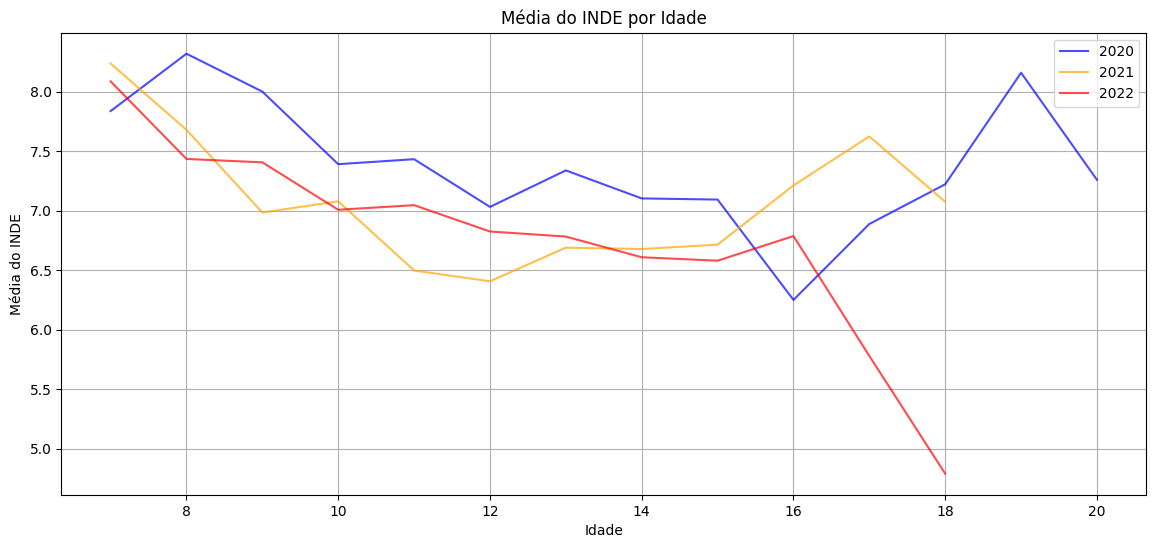

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(inde_por_idade_2020.index, inde_por_idade_2020.values, color='blue', alpha=0.7, label='2020')
plt.plot(inde_por_idade_2021.index, inde_por_idade_2021.values, color='orange', alpha=0.7, label='2021')
plt.plot(inde_por_idade_2022.index, inde_por_idade_2022.values, color='red', alpha=0.7, label='2022')
plt.xlabel('Idade')
plt.ylabel('Média do INDE')
plt.title('Média do INDE por Idade')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
means_by_year = round(df_aluno.groupby('ANO')[['IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN']].mean().T,2)

In [ ]:
df_aluno.dropna(subset=['INDE'], inplace=True)

In [ ]:
df_aluno['INDE'].isna().sum()

0

In [ ]:
means_by_year.head()

ANO,2020,2021,2022
IAA,8.37,8.15,8.26
IEG,7.68,6.82,7.88
IPS,6.74,6.84,6.90
IDA,6.32,5.43,6.07
IPP,7.07,7.58,6.30


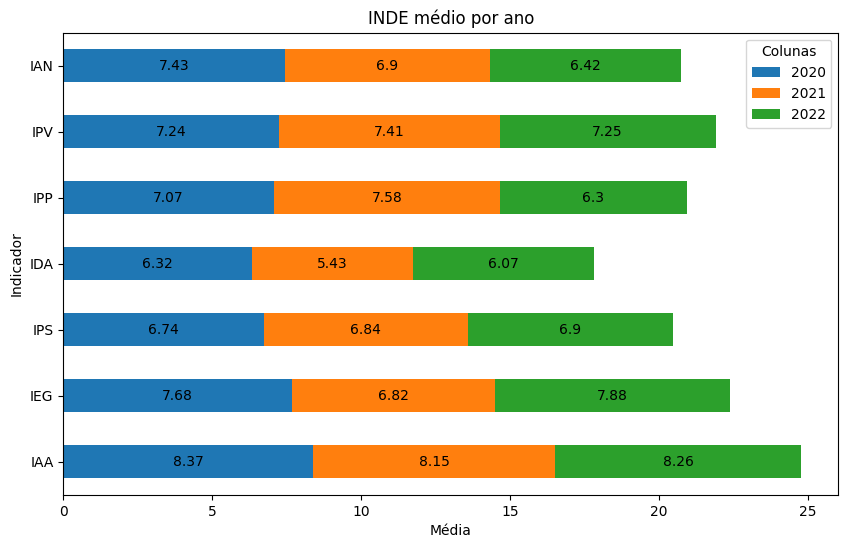

In [ ]:
ax = means_by_year.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Média')
plt.ylabel('Indicador')
plt.title('INDE médio por ano')
plt.legend(title='Colunas')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()

In [ ]:
df_aluno[df_aluno['ANO']=='2022'].count()

,0
NOME,862
ANO,862
PONTO_VIRADA,862
FASE,862
TURMA,862
PEDRA,862
INDE,862
IAA,862
IEG,862
IPS,862


# Desempenho acadêmico

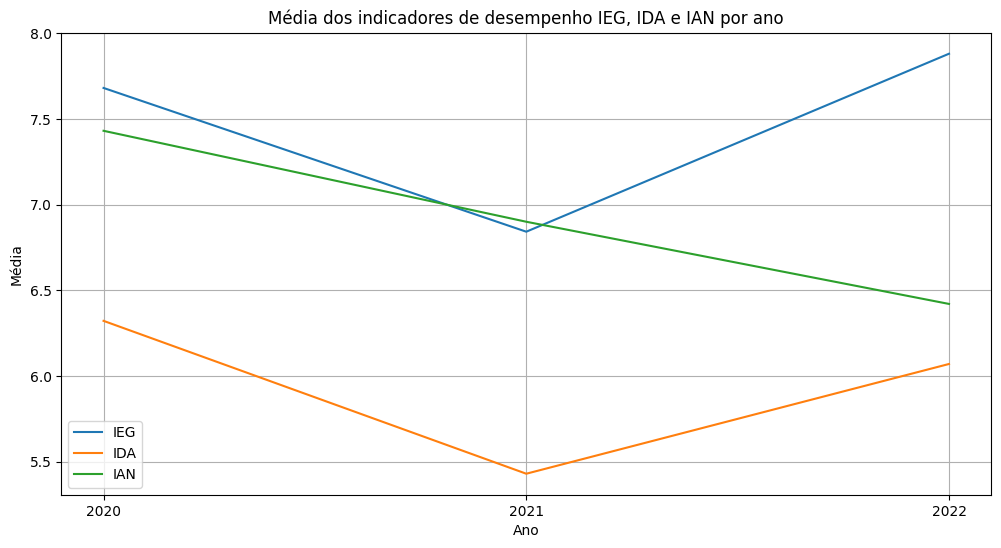

In [ ]:
plt.figure(figsize=(12, 6))
for column in ['IEG', 'IDA', 'IAN']:
  plt.plot(df_aluno.groupby('ANO')[column].mean().index, df_aluno.groupby('ANO')[column].mean().values, label=column)
plt.xlabel('Ano')
plt.ylabel('Média')
plt.title('Média dos indicadores de desempenho IEG, IDA e IAN por ano')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_aluno['FASE'].unique()

array(['2', '3', '1', '4', '0', '7', '5', '6', '8', 2.0, 3.0, 5.0, 1.0,
       0.0, 4.0, 7.0, 6.0], dtype=object)

In [ ]:
df_aluno['FASE'] = pd.to_numeric(df_aluno['FASE'], errors='coerce').astype('Int64')

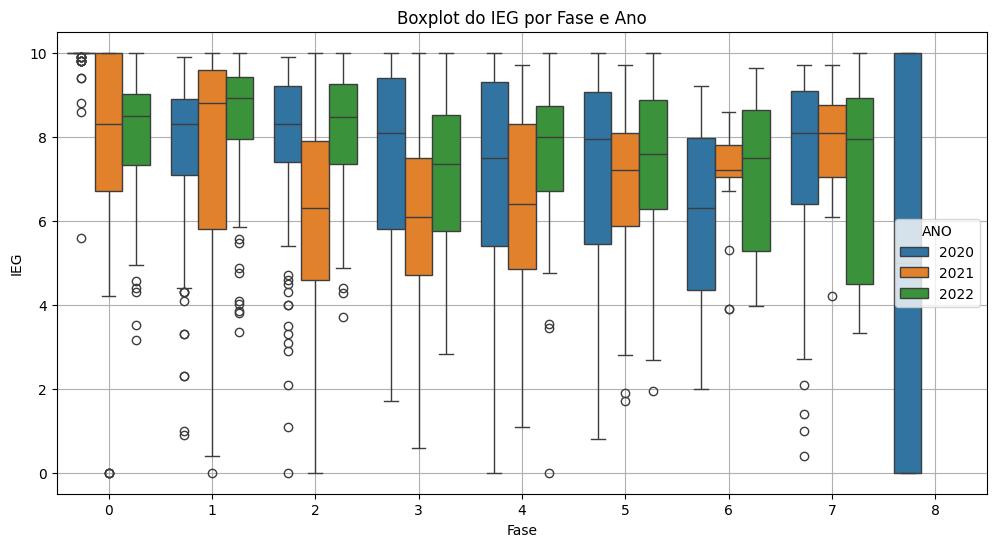

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='FASE', y='IEG', hue='ANO', data=df_aluno)
plt.xlabel('Fase')
plt.ylabel('IEG')
plt.title('Boxplot do IEG por Fase e Ano')
plt.grid()
plt.show()

# Análise ponto de virada

In [ ]:
df_aluno['PONTO_VIRADA'].unique()

array(['Não', 'Sim', nan], dtype=object)

In [ ]:
def convert_ponto_virada(value):
  if value == 'Sim':
    return 1
  else:
    return 0

In [ ]:
df_aluno['PONTO_VIRADA'] = df_aluno['PONTO_VIRADA'].apply(convert_ponto_virada)

In [ ]:
df_aluno['PONTO_VIRADA'].unique()

array([0, 1])

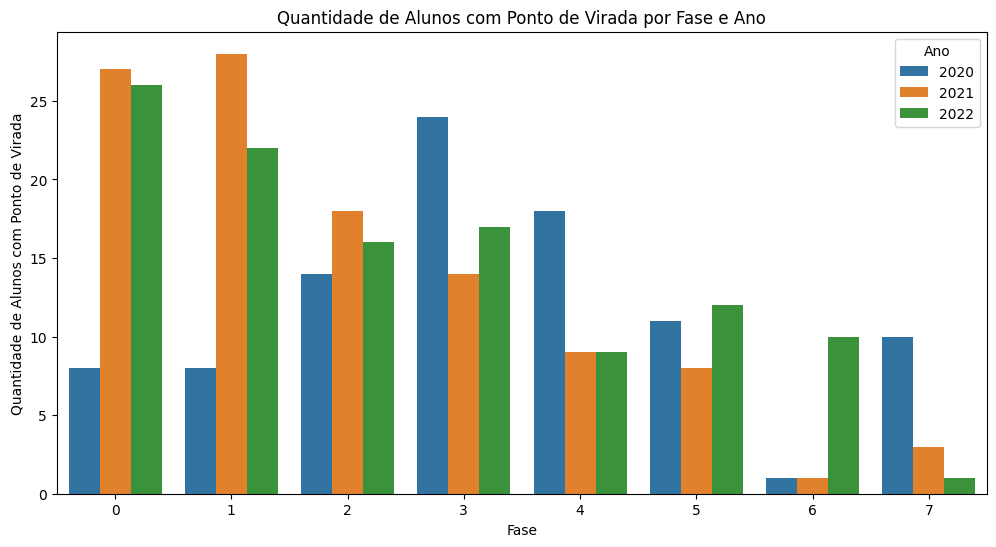

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='FASE', hue='ANO', data=df_aluno[df_aluno['PONTO_VIRADA'] == 1])
plt.xlabel('Fase')
plt.ylabel('Quantidade de Alunos com Ponto de Virada')
plt.title('Quantidade de Alunos com Ponto de Virada por Fase e Ano')
plt.legend(title='Ano')
plt.show()

In [ ]:
df_pv = df_aluno[df_aluno['PONTO_VIRADA'] == 1]
df_pv = df_pv.groupby("ANO")["PONTO_VIRADA"].count()
df_pv

,PONTO_VIRADA
ANO,
2020,94
2021,108
2022,113


In [ ]:
df_pv.loc['2020']

94

In [ ]:
'''
from google.colab import files
df_aluno.to_csv('df_aluno.csv', encoding='utf-8-sig', index=False)
files.download('df_aluno.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>